In [25]:
from sklearn import model_selection
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_classification, make_regression
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

<AxesSubplot:xlabel='x1', ylabel='x2'>

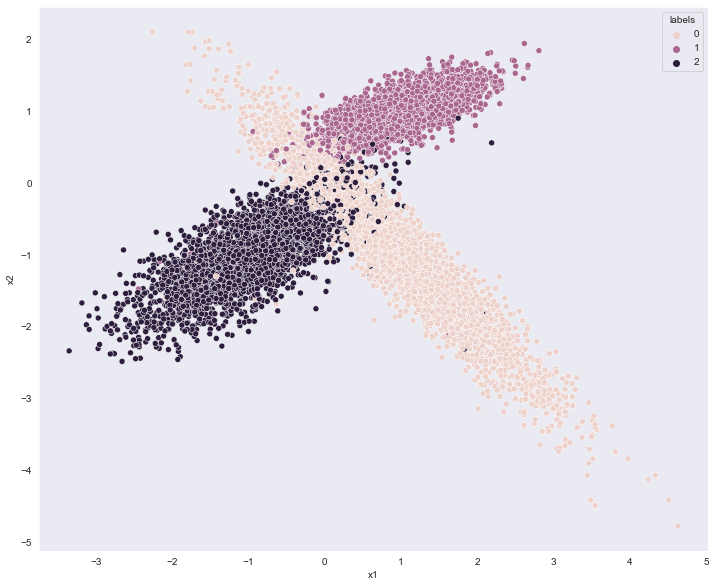

In [21]:
X, Y = make_classification(n_samples=10000,
                           n_features=2,
                           n_redundant=0,
                           n_classes=3, n_clusters_per_class=1, random_state=42)
dataset_1 = pd.DataFrame(data=X, columns=["x1" ,"x2"])
dataset_2 = pd.DataFrame(data=Y, columns=["labels"])
dataset = dataset_1.merge(dataset_2, left_index=True, right_index=True)
plt.rcParams.update({"figure.figsize": (12, 10)})
sns.set_style("dark")
sns.scatterplot(x="x1", y="x2", data=dataset, hue=dataset["labels"], hue_order=["1", "0", "2"])

In [26]:
train_data, test_data = model_selection.train_test_split(dataset, test_size=0.2)

In [28]:
gmm = GaussianMixture(n_components=3, n_init=10)
gmm.fit(train_data.loc[:, ["x1", "x2"]])

GaussianMixture(n_components=3, n_init=10)

In [33]:
# parameters

print("phi: ",gmm.weights_)
print("\n")
print("mu:", gmm.means_)
print("\n")
print("sigma: ", gmm.covariances_)
print("\n")
print("Convergence Status: ", gmm.converged_)
print("n_iters: ", gmm.n_iter_)

phi:  [0.33284025 0.33464336 0.33251639]


mu: [[ 1.01283585 -1.01465664]
 [ 0.99728672  0.99653607]
 [-0.99840859 -0.99444078]]


sigma:  [[[ 0.93934654 -0.94341549]
  [-0.94341549  1.04786013]]

 [[ 0.25461005  0.08328447]
  [ 0.08328447  0.06104045]]

 [[ 0.46637951  0.24755613]
  [ 0.24755613  0.24011964]]]


Convergence Status:  True
n_iters:  7
